# Problem 2-3

<img src="Exercicio 2-3-1.png">
<img src="Exercicio 2-3-2.png">
<img src="Exercicio 2-3-3.png">
<img src="Exercicio 2-3-4.png">
<img src="Exercicio 2-3-5.png">

In [3]:
# Lib Initialization 

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation


# Initial Conditions & Half Step

In [16]:


def potential(x):
    return 0.5 * x**2


def initialconditions(V, R0, deltax, L, timeframe):
    # Initialize the spatial grid
    x = np.linspace(-L, L, int(2 * L / deltax) + 1)
    n_x = len(x)
    
    # Calculate dx and dx squared
    dx = (x[-1] - x[0]) / (n_x - 1)
    dx2 = dx ** 2
    
    # Initialize wavefunction and potential arrays
    realPsi = np.zeros(n_x, dtype=np.longdouble)
    imagPsi = np.zeros(n_x, dtype=np.longdouble)
    potential = np.array([V(xi) for xi in x], dtype=np.longdouble)

    # Initialize the wavefunctions using provided functions
    for i in range(n_x):
        realPsi[i] = R0(x[i])

    # Initialize time step size
    dt = finddeltat(V, dx, L)
    
    # Half-step update for the imaginary part (as in the Java code)
    # Advances the imaginary part by half a time step
    for i in range(1, n_x - 1):
        deltaRe = (potential[i] * realPsi[i] 
                   - 0.5 * (realPsi[i + 1] - 2 * realPsi[i] + realPsi[i - 1]) / dx2)
        imagPsi[i] -= deltaRe * dt / 2

    # Apply boundary conditions (imagPsi and realPsi set to zero at boundaries)
    realPsi[0] = realPsi[-1] = 0.0
    imagPsi[0] = imagPsi[-1] = 0.0

    # Create time array
    t = np.arange(0, timeframe + dt, dt)

    return realPsi, imagPsi, x, t

def finddeltat(V,deltax,L):
    #in this specific potential(the harmonic trap) as V always increases for modulus(x), its biggest value is given by V(L)
    #As the harmonic trap is always positive, the lower bound is 0 
    upperbounddt = 1/((V(L)/2) + (1/deltax**2))
    deltat = round(upperbounddt/2,4)
    return deltat

def step(realPsi, imagPsi, potential, dx2, dt,x):
    n = len(imagPsi)
    # Copy arrays to avoid overwriting values needed for computations
    realPsi_old = realPsi.copy()
    imagPsi_old = imagPsi.copy()

    # Update realPsi using imagPsi_old
    for i in range(1, n - 1):
        imH = potential(x[i]) * imagPsi_old[i] - 0.5 * (imagPsi_old[i + 1] - 2 * imagPsi_old[i] + imagPsi_old[i - 1]) / dx2
        realPsi[i] += imH * dt

    # Apply boundary conditions to realPsi
    realPsi[0] = 0.0
    realPsi[-1] = 0.0

    # Update imagPsi using updated realPsi
    for i in range(1, n - 1):
        reH = potential(x[i]) * realPsi[i] - 0.5 * (realPsi[i + 1] - 2 * realPsi[i] + realPsi[i - 1]) / dx2
        imagPsi[i] -= reH * dt

    # Apply boundary conditions to imagPsi
    imagPsi[0] = 0.0
    imagPsi[-1] = 0.0

    return realPsi, imagPsi

def visscheralgorithm(potential, R0, deltax, L, timeframe):
    x = np.arange(-L, L + deltax, deltax)
    n_x = x.size
    dx2 = deltax ** 2


    # Compute time step size
    dt = finddeltat(potential, deltax, L)
    n_t = int(timeframe / dt) + 1  # Ensure the total time is covered
    t = np.linspace(0, timeframe, n_t)

    # Initialize wavefunction arrays
    realPsi = R0(x)
    imagPsi = np.zeros_like(realPsi)

    # Arrays to store wavefunction over time
    R = np.zeros((n_t, n_x))
    I = np.zeros((n_t, n_x))

    # Store initial conditions
    R[0, :] = realPsi
    I[0, :] = imagPsi

    # Time-stepping loop
    for j in range(1, n_t):
        realPsi, imagPsi = step(realPsi, imagPsi, potential, dx2, dt,x)
        R[j, :] = realPsi
        I[j, :] = imagPsi

    # Transpose R and I to match shape (n_x, n_t)
    R = R.T
    I = I.T

    return x, t, R, I,dt




## a) Consider the initial state:

$\psi(x,0) = (\frac{1}{4})^{1/4} e^{-x^2 /2}$

What happens? Why?

In [38]:
# In this case


def initialstatea(x):
    return ((1/np.pi)**(1/4))*np.exp(-(x**2)/2)



x,t,R,I,deltat = visscheralgorithm(potential,initialstatea,0.3,30,10)
 # Calculate probability density
P_A = np.zeros_like(R)
for i in range(R.shape[0]-1): 
    for j in range(R.shape[1]-2):
        P_A[i,j] = (R[i,j]**2)+ I[i,j]*I[i,j+1] 
print(deltat)
P_A.max()


0.0021


0.5716119078125577

# Gif Generation

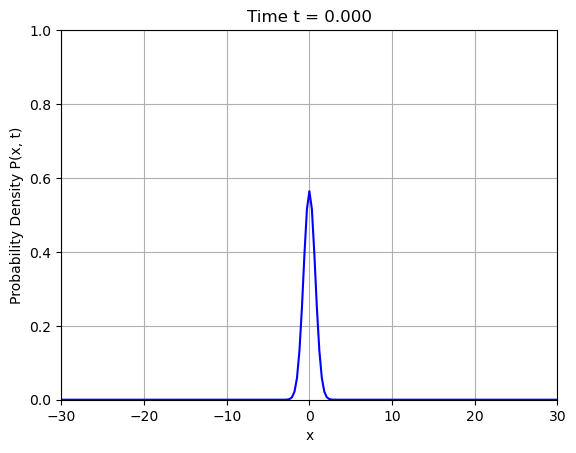

In [39]:
fig, ax = plt.subplots()

skipsize = 20  # Set your desired skip size here

def animate(i):
    ax.clear()
    # i is the actual frame index after skipping
    ax.plot(x, P_A[:, i], color='blue')
    # Set plot limits
    ax.set_xlim(x[0], x[-1])
    ax.set_ylim(0, 1)
    ax.set_xlabel('x')
    ax.set_ylabel('Probability Density P(x, t)')
    ax.set_title(f'Time t = {t[i]:.3f}')
    ax.grid(True)

# Create a list of frame indices, selecting every 'skipsize' frame
frame_indices = range(0, len(t), skipsize)

# Adjust the interval to maintain the total animation duration
original_interval = 50  # Original interval in milliseconds
adjusted_interval = original_interval * skipsize

# Create the animation object
anim = FuncAnimation(
    fig,
    animate,
    frames=frame_indices,   # Use the list of skipped frames
    interval=adjusted_interval,  # Adjust interval accordingly
    repeat=False
)

# Save the animation as a GIF
anim.save('probability_density_evolution_a.gif', writer='pillow', fps=20)

## b)

In [42]:
def initialstateb(x):
    return ((2/np.pi)**(1/4))*np.exp(-(x**2))

x,t,R,I,deltat = visscheralgorithm(potential,initialstateb,0.3,30,10)
 # Calculate probability density
P_B = np.zeros_like(R)
for i in range(R.shape[0]-1): 
    for j in range(R.shape[1]-2):
        P_B[i,j] = (R[i,j]**2)+ I[i,j]*I[i,j+1] 
print(deltat)
P_B.max()

0.0021


0.7978909966688543

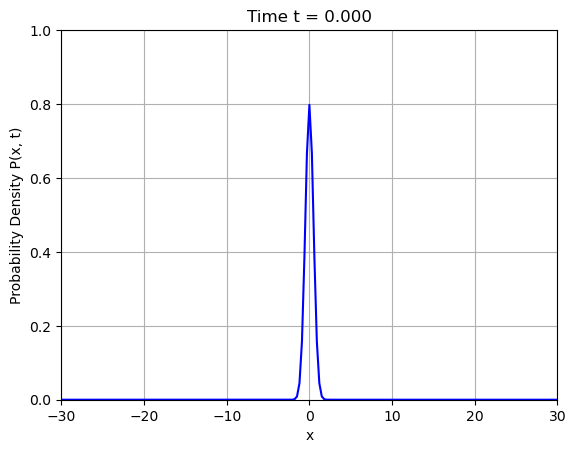

In [43]:
fig, ax = plt.subplots()

skipsize = 20

def animate(i):
    ax.clear()
    ax.plot(x, P_B[:, i], color='blue')
    ax.set_xlim(x[0], x[-1])
    ax.set_ylim(0, 1)
    ax.set_xlabel('x')
    ax.set_ylabel('Probability Density P(x, t)')
    ax.set_title(f'Time t = {t[i]:.3f}')
    ax.grid(True)

#list of frame indices
frame_indices = range(0, len(t), skipsize)


original_interval = 50  # Original interval in milliseconds
adjusted_interval = original_interval * skipsize

# animation object
anim = FuncAnimation(
    fig,
    animate,
    frames=frame_indices,   # list of skipped frames
    interval=adjusted_interval,  
    repeat=False
)

# Save the animation as a GIF
anim.save('probability_density_evolution_b.gif', writer='pillow', fps=20)

# c)

In [60]:


def I0(x):
    return 0.0  # Initial imaginary part is zero

# Calculate maximum stable time step size for linear part
def finddeltat(V, deltax, L):
    # Calculate the maximum potential value within the domain
    x_max = L
    V_max = V(x_max)
    # Compute the stability limit for the time step
    deltat = 1 / ((V_max / 2) + (1 / deltax**2))
    return deltat

# Function to perform a single step update with the nonlinear interaction term
def step(realPsi, imagPsi, potential, dx2, dt, U0):
    n = len(realPsi)

    # Copy arrays to avoid overwriting values needed for computations
    realPsi_old = realPsi.copy()
    imagPsi_old = imagPsi.copy()

    # Update realPsi using imagPsi_old with nonlinear interaction
    for i in range(1, n - 1):
        # Compute Hamiltonian operator acting on imagPsi (nonlinear)
        laplacian_imagPsi = (imagPsi_old[i + 1] - 2 * imagPsi_old[i] + imagPsi_old[i - 1]) / dx2
        interaction_term = U0 * (realPsi_old[i] ** 2 + imagPsi_old[i] ** 2)
        H_imag = -0.5 * laplacian_imagPsi + potential[i] + interaction_term

        # Update realPsi with nonlinear interaction
        denominator = 1 - dt * U0 * realPsi_old[i] * imagPsi_old[i]
        realPsi[i] = (realPsi_old[i] + dt * H_imag * imagPsi_old[i]) / denominator

    # Apply boundary conditions to realPsi
    realPsi[0] = 0.0
    realPsi[-1] = 0.0

    # Update imagPsi using updated realPsi with nonlinear interaction
    for i in range(1, n - 1):
        # Compute Hamiltonian operator acting on realPsi (nonlinear)
        laplacian_realPsi = (realPsi[i + 1] - 2 * realPsi[i] + realPsi[i - 1]) / dx2
        interaction_term = U0 * (realPsi[i] ** 2 + imagPsi[i] ** 2)
        H_real = -0.5 * laplacian_realPsi + potential[i] + interaction_term

        # Update imagPsi with nonlinear interaction
        denominator = 1 + dt * U0 * imagPsi_old[i] * realPsi_old[i]
        imagPsi[i] = (imagPsi_old[i] - dt * H_real * realPsi[i]) / denominator

    # Apply boundary conditions to imagPsi
    imagPsi[0] = 0.0
    imagPsi[-1] = 0.0

    return realPsi, imagPsi

# Function to implement the Visscher algorithm with the nonlinear term
def visscheralgorithmnonlinear(V, R0, I0, deltax, L, timeframe, U0):
    x = np.linspace(-L, L, int(2 * L / deltax) + 1)
    n_x = len(x)
    dx2 = deltax ** 2

    # Initialize potential
    potential_values = np.array([V(xi) for xi in x], dtype=np.longdouble)

    # Compute time step size
    dt = finddeltat(V, deltax, L)
    n_t = int(timeframe / dt) + 1  # Ensure the total time is covered
    t = np.linspace(0, timeframe, n_t)

    # Initialize wavefunction arrays
    realPsi = np.array([R0(xi) for xi in x], dtype=np.longdouble)
    imagPsi = np.array([I0(xi) for xi in x], dtype=np.longdouble)

    # Arrays to store wavefunction over time
    R = np.zeros((n_t, n_x))
    I = np.zeros((n_t, n_x))

    # Store initial conditions
    R[0, :] = realPsi
    I[0, :] = imagPsi

    # Time-stepping loop
    for j in range(1, n_t):
        realPsi, imagPsi = step(realPsi, imagPsi, potential_values, dx2, dt, U0)
        R[j, :] = realPsi
        I[j, :] = imagPsi

    # Transpose R and I to match shape (n_x, n_t)
    R = R.T
    I = I.T

    return x, t, R, I,dt






In [78]:

# Potential function (V=0 for this specific problem)
def potential(x):
    return 0.0
def initialstatecimag(x):
    return 0.0

# Nonlinear parameter U0
U0 = -2
# Define the initial wavefunction components
def initialstatec(x):
    return 1.0 / (np.sqrt(2) * np.cosh(x))

x,t,R,I,deltat = visscheralgorithmnonlinear(potential,initialstatec,initialstatecimag,0.5,30,6,U0)
 # Calculate probability density
P_C = np.zeros_like(R)
for i in range(R.shape[0]-1): 
    for j in range(R.shape[1]-2):
        P_C[i,j] = (R[i,j]**2)+ I[i,j]*I[i,j+1] 
print(deltat)
P_C.max()

0.25


1.235703668051067

## Gif Implementation

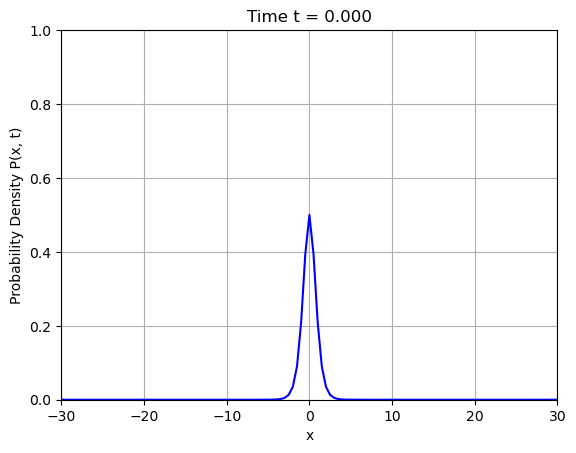

In [80]:
fig, ax = plt.subplots()

skipsize = 1

def animate(i):
    ax.clear()
    ax.plot(x, P_C[:, i], color='blue')
    ax.set_xlim(x[0], x[-1])
    ax.set_ylim(0, 1)
    ax.set_xlabel('x')
    ax.set_ylabel('Probability Density P(x, t)')
    ax.set_title(f'Time t = {t[i]:.3f}')
    ax.grid(True)

#list of frame indices
frame_indices = range(0, len(t), skipsize)


original_interval = 50  # Original interval in milliseconds
adjusted_interval = original_interval * skipsize

# animation object
anim = FuncAnimation(
    fig,
    animate,
    frames=frame_indices,   # list of skipped frames
    interval=adjusted_interval,  
    repeat=False
)

# Save the animation as a GIF
anim.save('probability_density_evolution_c.gif', writer='pillow', fps=20)